# Assignment 10
Introduction to Numerical Problem Solving, Spring 2017   
7.4.2017, Ali Bahrami

Helsinki Metropolia University of Applied Sciences


In [258]:
%pylab inline
import scipy.optimize as optimize
from scipy.optimize import root 
from numpy.polynomial.polynomial import polyval, polyroots, polyfromroots

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['polyval']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Exercise 09, Problem 6

### Solution
First we define the derivate function and then the Newton-Raphson method. 

In [172]:
def fPerim(f,x):
    #eps= sys.float_info.epsilon;
    h= 1.0 *10**-9
    return (f(x+h)-f(x))/h

def newtonSearch(f, x0, tol, maxiter):
    xi=x0
    n=1
    while(True):
        x0=xi
        xi=x0-(f(xi)/fPerim(f,xi))
        n+=1
        if(n>maxiter) or (abs(xi-x0) < tol):
            break
    return x0,n


    
x0=-2.0
tol=0.0001
maxiter=80

f1 = lambda x : x**2 - x - 1
f2 = lambda x : x**3 - 3 * sin ( x )
f3 = lambda x : exp(x) - 2
f4 = lambda x : 1 - x ** 2 + sin(50/(1+x**2))

print("For f(x)= x**2 - x - 1 , x ={0[0]:.4f}, n={0[1]:d}".format(newtonSearch(f1,x0,tol,maxiter)))
print("For f(x)= x**3 - 3 * sin ( x ) , x ={0[0]:.4f}, n={0[1]:d}".format(newtonSearch(f2,x0,tol,maxiter)))
print("For f(x)= exp(x) - 2 , x ={0[0]:.4f}, n={0[1]:d}".format(newtonSearch(f3,x0,tol,maxiter)))
print("For f(x)= 1 - x ** 2 + sin(50/(1+x**2)) , x ={0[0]:.4f}, n={0[1]:d}".format(newtonSearch(f4,x0,tol,maxiter)))
print ("\n\nResults from newton() method of scipy:\n")
print("For f(x)= x**2 - x - 1 , x ={0:.4f}".format(newton(f1,x0,tol=0.01,maxiter=80)))
print("For f(x)= x**3 - 3 * sin ( x ) , x ={0:.4f}".format(newton(f2,x0,tol=0.01,maxiter=80)))
print("For f(x)= exp(x) - 2 , x ={0:.4f}".format(newton(f3,x0,tol=0.01,maxiter=80)))
print("For f(x)= 1 - x ** 2 + x ={0:.4f}".format(newton(f4,x0,tol=0.01,maxiter=80)))


For f(x)= x**2 - x - 1 , x =-0.6180, n=6
For f(x)= x**3 - 3 * sin ( x ) , x =-1.4380, n=6
For f(x)= exp(x) - 2 , x =0.6932, n=17
For f(x)= 1 - x ** 2 + sin(50/(1+x**2)) , x =-1.2530, n=7


Results from newton() method of scipy:

For f(x)= x**2 - x - 1 , x =-0.6180
For f(x)= x**3 - 3 * sin ( x ) , x =-1.4384
For f(x)= exp(x) - 2 , x =-1.9999
For f(x)= 1 - x ** 2 + x =-0.9952


If the starting point is the same as a=- 2.0, then results from increment search has higher accuracy but also more steps or iteration is needed to achieve them. Regarding newton approach one can conclude that with less iteration, results for the first three functions are accurate enough if h in derivate function and tol as the tolerance criteria are chosen appropriately. 

Results from scipy newton function differ in the root of the third function. The difference in the third function might come from a different approach in calculating the derivative of the function and also possibly, the use of secant in scipy newton method.

The results from both newton methods are different from the previous methods for the forth function too. For the forth one, as this approach is not looking for a change in sign for finding the root, it is probable that the first root result varies from those methods which are dependent on the change of the sign (or passing the x axis).


## Exercise 10, Problem 1

### Solution

We have the following function:

In [193]:
def f5(x):
    return -26+85*x-91*x**2+44*x**3-8*x**4+x**5

    

## (a) 

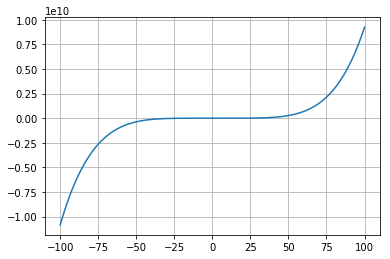

In [194]:
x = linspace(-100, 100, 10000)
y=f5(x)
plot(x,y)
grid()


The results for y shows a significant big number as x moves to 100 and a very small number as x moves to -100 

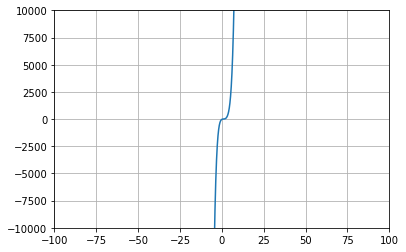

In [195]:
plot(x,y)
xlim([-100,100])
ylim([-10000,10000])
grid()

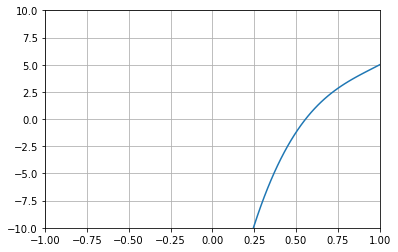

In [196]:
plot(x,y)
xlim([-1,1])
ylim([-10,10])
grid()

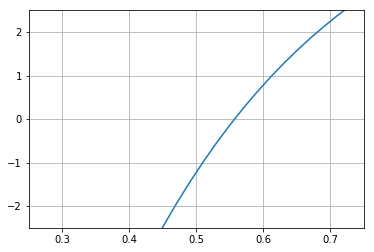

In [197]:
plot(x,y)
xlim([0.25,0.75])
ylim([-2.5,2.5])
grid()

for x=0.55717 f(x)=0.00278


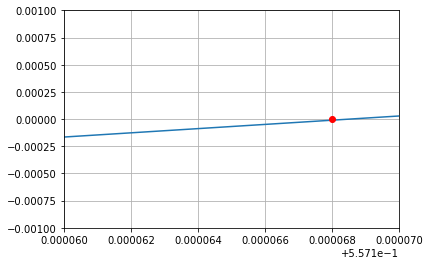

In [199]:
plot(x,y)
xlim([0.55716,0.55717])
ylim([-0.001,0.001])
plot(0.557168,0,"ro")
grid()
print("for x={0:.5f} f(x)={1:.5f}".format(0.557168,f5(0.557168)))

### (b)

In [207]:
def fBasedOnX(x):
    return (-26-91*x**2+44*x**3-8*x**4+x**5)/-85

def fixedPoint( x0, tol, maxiter):
    xi=x0
    n=1
    while(True):
        x0=xi
        xi=fBasedOnX(x0)
        n+=1
        ea= (xi-x0)/xi *100
        if(n>maxiter) or (abs(ea) < tol):
            break
    return x0,n


    
x0=-1.0
tol=0.0001
maxiter=80
results=fixedPoint(x0,tol,maxiter)

print("Based on fixedPoint method root ={0[0]:.8f}, n={0[1]:d}".format(results))
print("Checking with that value, f(root)=",f5(results[0]))




Based on fixedPoint method root =0.55702772, n=60
Checking with that value, f(root)= 4.303211385336958e-05


## (c)

In [208]:
result=newton(f5,x0,tol=tol,maxiter=maxiter)
print("Based on Scypi newton() method root ={0:.8f}".format(result))
print("Checking with that value, f(root)=",f5(result))

results= newtonSearch(f5,x0,tol=tol,maxiter=maxiter)
print("Based on NewtonSearch root ={0[0]:.8f}, n={0[1]:d}".format(results))
print("Checking with that value, f(root)=",f5(results[0]))


Based on Scypi newton() method root =0.55702552
Checking with that value, f(root)= -1.2700297168100061e-08
Based on NewtonSearch root =0.55696311, n=8
Checking with that value, f(root)= -0.001218803671731411


### (d)

In [213]:
polyroots([-26, 85, -91, 44,-8,1.0])


array([ 0.55702552+0.j        ,  1.13077604-0.70121119j,
        1.13077604+0.70121119j,  2.59071120-4.43326974j,
        2.59071120+4.43326974j])

The results show that there is only one real root for the function and there are four complex valued roots too.


### problem 7
### Solution


$y+5xy=x^2$

$(5x+1)y=x^2$

$\frac{(5x+1)y}{5x+1}=\frac{x^2}{5x+1}$

$y=\frac{x^2}{5x+1}$



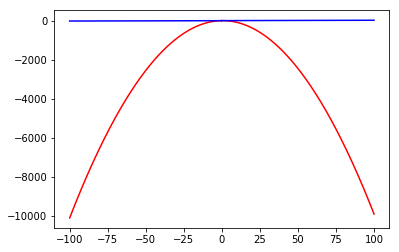

In [220]:
x = linspace(-100, 100, 100000)
y1=-x**2+x+0.75
y2= x**2 /(5*x+1)
plot(x,y1,"r")
plot(x,y2,"b")


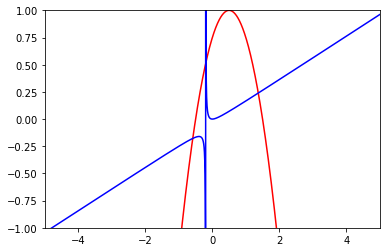

In [223]:
xlim([-5,5])
ylim([-1,1])
plot(x,y1,"r")
plot(x,y2,"b")


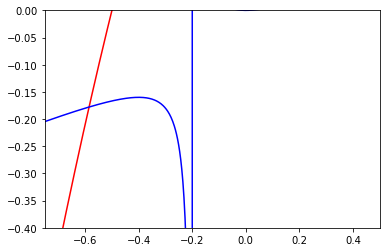

In [225]:
xlim([-0.75,0.50])
ylim([-0.4,0.0])
plot(x,y1,"r")
plot(x,y2,"b")


There is one root between 0.5 and 1.0

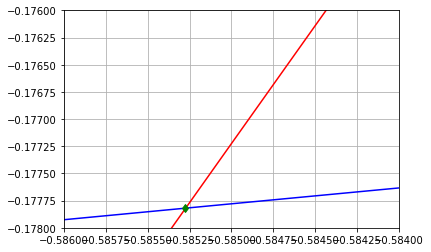

In [246]:
xlim([-0.586,-0.584])
ylim([-0.178,-0.176])
plot(x,y1,"r")
plot(x,y2,"b")
grid()

plot(-0.58528,-0.17782,"gd")

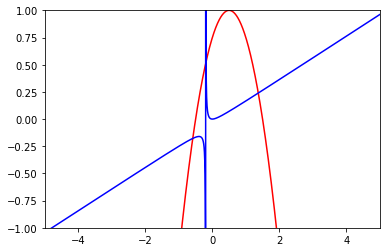

In [247]:
xlim([-5,5])
ylim([-1,1])
plot(x,y1,"r")
plot(x,y2,"b")


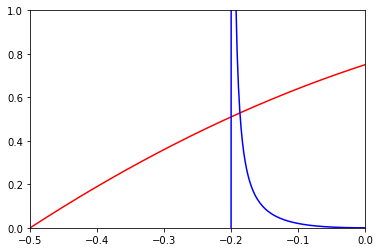

In [248]:
xlim([-0.5,0])
ylim(0,1)
plot(x,y1,"r")
plot(x,y2,"b")


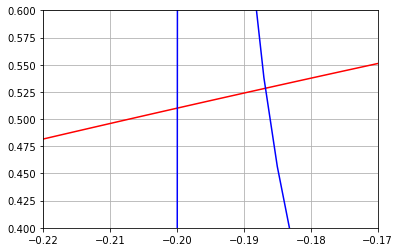

In [255]:
xlim([-0.22,-0.17])
ylim(0.4,0.6)
plot(x,y1,"r")
plot(x,y2,"b")
grid()

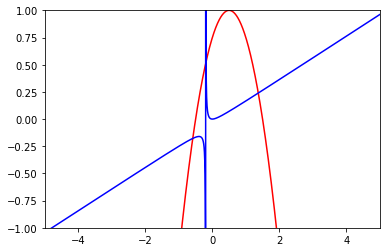

In [250]:
xlim([-5,5])
ylim([-1,1])
plot(x,y1,"r")
plot(x,y2,"b")


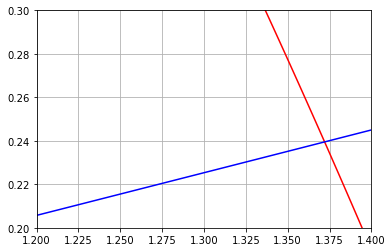

In [253]:
xlim([1.2,1.4])
ylim([0.2,0.3])
plot(x,y1,"r")
plot(x,y2,"b")
grid()

Graphic results are: 

$-0.21<x_4<-0.19$ , $0.500<y_4<0.525$

$-0.19<x_3<-0.18$ , $0.525<y_3<0.550$

$1.350<x_2<1.375$ , $0.22<y_2<0.26$

$-0.58<x_1<-0.57$ , $-0.17<y_1<-0.16$

### (b)


 Optimize has a fix point method which is used here. By substituting y in the first equation we have:
$-2x^2 + 5  x^2 - 5 x^3 +(5*0.75 +1)x +0.75=0$


In [300]:

def fixedPoint( x0,fBasedOnX, tol, maxiter):
    xi=x0
    n=1
    while(True):
        x0=xi
        xi=fBasedOnX(x0)
        n+=1
        ea= (xi-x0)/xi *100
        if(n>maxiter) or (abs(ea) < tol):
            break
    return x0,n


def g(x):
    return ((-3*x**2 + 5*x**3)-0.75)/(4.75)
def f1(x):
    return -x**2+x+0.75
def f2(x):
    return x**2/(1+5*x)

tol= 0.001
maxiter=20

x0=-0.22
results=fixedPoint(x0,g,tol,maxiter)
print("x1 =",results[0],"y1=",f1(results[0]),"y1 from the other function=",f2(results[0]))

x0=-0.185
results=fixedPoint(x0,g,tol,maxiter)
print("x2 =",results[0],"y1=",f1(results[0]),"y2 from the other function=",f2(results[0]))

x0=0.136
results=fixedPoint(x0,g,tol,maxiter)
print("x3 =",results[0],"y1=",f1(results[0]),"y3 from the other function=",f2(results[0]))

x0=-0.58
results=fixedPoint(x0,g,tol,maxiter)
print("x4 =",results[0],"y1=",f1(results[0]),"y4 from the other function=",f2(results[0]))



x1 = -0.1867944558168028 y1= 0.5283133754593017 y1 from the other function= 0.5284472679027103
x2 = -0.1867905532467331 y1= 0.5283187359710463 y2 from the other function= 0.5282690703695313
x3 = -0.18679033512482643 y1= 0.5283190355791286 y3 from the other function= 0.5282591136981668
x4 = -0.18679346823573797 y1= 0.5283147319887264 y4 from the other function= 0.5284021633894185


The function successfully finds a correct intersection but it can not produce the rest of intersections. This issue is now under study and results will be later added.

Moreover there is a fixed point method in optimizer which Here is a short usage of it.


In [304]:
optimize.fixed_point(g,x0)


array(-0.5852737964338236)

In [269]:
def f(x):
    f1=-x[0]**2+x[0]+0.75-x[1]
    f2= x[0]**2-5*x[0]*x[1]-x[1] 
    return [f1,f2] 

x00=[-0.22,0.40]
x01=[-0.17,0.55]
x02=[1.35,0.22]
x03=[-0.58,-0.17]

r=root(f,x00)
print("\n",r)
r=root(f,x01)
print("\n",r)
r=root(f,x02)
print("\n",r)
r=root(f,x03)
print("\n",r)







     fjac: array([[-0.41909542,  0.9079422 ],
       [-0.9079422 , -0.41909542]])
     fun: array([  1.26184618e-11,   7.53686002e-12])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([  1.25758291e-10,  -1.04261775e-09])
       r: array([-3.31150622,  0.35746412,  0.95130988])
  status: 1
 success: True
       x: array([-0.18679161,  0.52831729])

     fjac: array([[-0.42038364,  0.90734646],
       [-0.90734646, -0.42038364]])
     fun: array([  7.82929277e-13,  -1.16897603e-11])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([ -2.76800315e-09,   1.06200744e-09])
       r: array([-3.25805567,  0.30321991,  0.95711377])
  status: 1
 success: True
       x: array([-0.18679161,  0.52831729])

     fjac: array([[-0.7371964 ,  0.67567853],
       [-0.67567853, -0.7371964 ]])
     fun: array([  1.68809411e-13,   1.72806214e-13])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([  7.99841177e-11,   2.35413958e-09])
       r: array([ 2.3294853

### Note
The root function does not find one of the roots where the asymptote exist(  x= -0.2)